## 영화 데이터 분석
### 데이터 기본 통계 정보 파악

In [18]:
import pandas as pd
# CSV 파일 불러오기
df = pd.read_csv('imdb_top_1000.csv')

In [19]:
# 처음 5개 행을 불러와 데이터 구조 파악하기
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [23]:
# 기본 통계 정보 확인하기
# Gross의 자료형을 숫자형으로 바꿈
df['Gross'] = df['Gross'].str.replace(",", "")
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,7.949300,77.971530,2.736929e+05,6.803475e+07
std,0.275491,12.376099,3.273727e+05,1.097500e+08
min,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,8.100000,87.000000,3.741612e+05,8.075089e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


### 1. 평점과 흥행 여부의 관계
- 수익 3사분위수를 기준으로 흥행 영화를 정의했다.
- 흥행한 영화들의 평점이 더 높을거라고 생각했으나, 평점이 영화의 흥행 여부를 설명하지 못했다.

In [30]:
# 흥행 여부 열 추가
q3 = df['Gross'].quantile(0.75)
df['Hit'] = df['Gross'] >= q3
print("\n흥행 영화와 비흥행 영화의 개수 :")
df.groupby('Hit')['Series_Title'].count()


흥행 영화와 비흥행 영화의 개수 :


Hit
False    792
True     208
Name: Series_Title, dtype: int64

In [27]:
# 흥행 영화와 비흥행 영화의 수익 평균 비교
df.groupby('Hit')[['IMDB_Rating', 'Meta_score']].mean()

,IMDB_Rating,Meta_score
Hit,,
False,7.938258,78.300314
True,7.991346,76.961353


In [28]:
# 대중 평점 구간별 흥행 비율 비교
df['IMDB_bin'] = pd.cut(df['IMDB_Rating'], bins=[0, 2, 4, 6, 8, 10])
df.groupby('IMDB_bin')['Hit'].mean()

C:\Users\82102\AppData\Local\Temp\ipykernel_4852\2152774835.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('IMDB_bin')['Hit'].mean()


IMDB_bin
(0, 2]          NaN
(2, 4]          NaN
(4, 6]          NaN
(6, 8]     0.203540
(8, 10]    0.217391
Name: Hit, dtype: float64

In [31]:
# 평론가 평점 구간별 흥행 비율 비교
df['Meta_bin'] = pd.cut(df['Meta_score'], bins=[0, 20, 40, 60, 80, 100])
df.groupby('Meta_bin')['Hit'].mean()

C:\Users\82102\AppData\Local\Temp\ipykernel_4852\1991464973.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Meta_bin')['Hit'].mean()


Meta_bin
(0, 20]           NaN
(20, 40]     0.000000
(40, 60]     0.227273
(60, 80]     0.274359
(80, 100]    0.222513
Name: Hit, dtype: float64

<Axes: title={'center': 'IMDB_Rating'}, xlabel='Hit'>

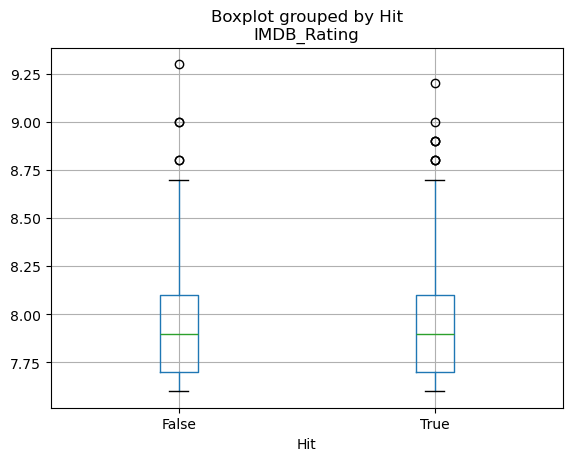

In [34]:
# 시각화
df.boxplot(column='IMDB_Rating', by='Hit')

<Axes: title={'center': 'Meta_score'}, xlabel='Hit'>

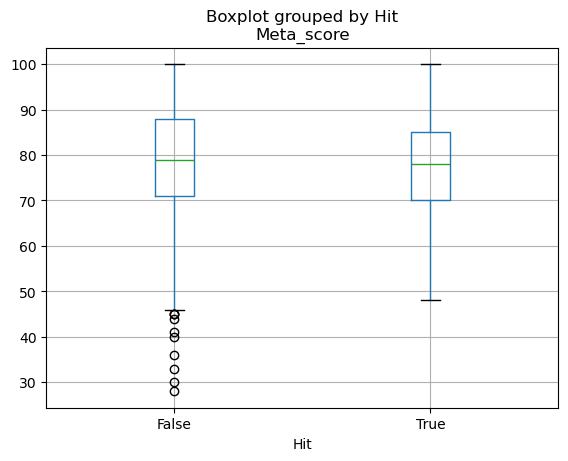

In [35]:
# 시각화
df.boxplot(column='Meta_score', by='Hit')

### 2. 관람 등급에 따른 수익 차이
- 관람 등급이 다양한 관계 A, R, U, UA 등급을 중심으로 분석하였다.
- 관람 연령대가 다양할수록 수익 규모가 커지는 모습이 보였다.

In [37]:
# 관람 등급에 따른 영화 개수 차이
df.groupby('Certificate')['Series_Title'].count()

Certificate
16            1
A           197
Approved     11
G            12
GP            2
PG           37
PG-13        43
Passed       34
R           146
TV-14         1
TV-MA         1
TV-PG         3
U           234
U/A           1
UA          175
Unrated       1
Name: Series_Title, dtype: int64

In [38]:
# 가장 많은 4개의 등급만 선택
select_rate = ['A', 'R', 'U', 'UA']
df_rated = df[df['Certificate'].isin(select_rate)]

In [40]:
# 관람 등급에 따른 영화 수익 차이
df_rated.groupby('Certificate')['Gross'].describe()

,count,mean,std,min,25%,50%,75%,max
Certificate,,,,,,,,
A,180.0,6.388713e+07,6.372491e+07,10950.0,14469582.75,45555724.0,100040785.0,335451311.0
R,135.0,2.579360e+07,5.348993e+07,1305.0,1596334.50,6391436.0,23619779.0,363070709.0
U,200.0,8.724658e+07,1.206996e+08,70147.0,4405000.00,40155347.0,132172178.5,936662225.0
UA,163.0,1.311460e+08,1.654681e+08,7461.0,13599994.50,61649911.0,211917227.5,858373000.0


<Axes: title={'center': 'Gross'}, xlabel='Certificate'>

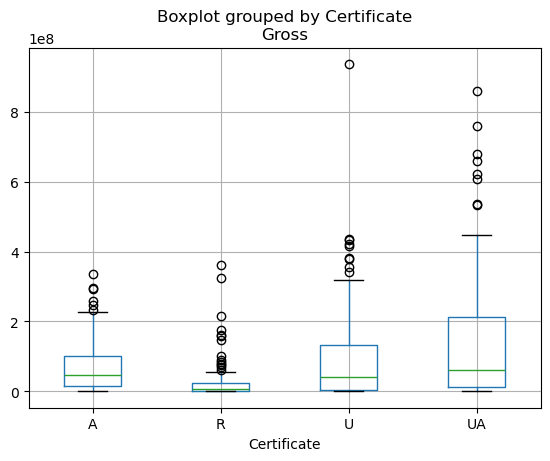

In [41]:
# 시각화
df_rated.boxplot(column='Gross', by='Certificate')